In [339]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [340]:
# Define dir
data_dir = os.getcwd() + "/data/"
print(data_dir)

c:\Backup\New Volume (D)\Bojana\data challenge\script/data/


In [341]:
# File to preprocess
customers = "customers.csv"
libraries = "libraries.csv"
books = "books.csv"
checkouts = "checkouts.csv"

In [342]:
# Load data
customers = pd.read_csv(data_dir + customers)
libraries = pd.read_csv(data_dir + libraries)
books = pd.read_csv(data_dir + books)
checkouts = pd.read_csv(data_dir + checkouts)

In [343]:
# Check types
checkouts.dtypes

id               object
patron_id        object
library_id       object
date_checkout    object
date_returned    object
dtype: object

In [344]:
# Custom function to parse dates with multiple formats
def parse_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%Y|%m|%d')
    except:
        try:
            return pd.to_datetime(date_str, format='%Y-%m-%d')
        except:
            return pd.NaT

# Apply the custom function to the date_checkout and date_returned columns
checkouts['date_checkout'] = checkouts['date_checkout'].apply(parse_date)
checkouts['date_returned'] = checkouts['date_returned'].apply(parse_date)
checkouts.head()

,id,patron_id,library_id,date_checkout,date_returned
0,-xFj0vTLbRIC,b071c9c68228a2b1d00e6f53677e16da,225-222@5xc-jtz-hkf,2019-01-28,2018-11-13
1,HUX-y4oXl04C,8d3f63e1deed89d7ba1bf6a4eb101373,223-222@5xc-jxr-tgk,2018-05-29,2018-06-12
2,TQpFnkku2poC,4ae202f8de762591734705e0079d76df,228-222@5xc-jtz-hwk,2018-11-23,2019-01-24
3,OQ6sDwAAQBAJ,f9372de3c8ea501601aa3fb59ec0f524,23v-222@5xc-jv7-v4v,2018-01-15,2018-04-25
4,7T9-BAAAQBAJ,2cf3cc3b9e9f6c608767da8d350f77c9,225-222@5xc-jtz-hkf,2018-12-31,1804-01-23


In [345]:
# Convert dates to datetime format
checkouts['date_checkout'] = pd.to_datetime(checkouts['date_checkout'])
checkouts['date_returned'] = pd.to_datetime(checkouts['date_returned'])

# Define late returns (more than 28 days)
checkouts['days_checkedout'] = (checkouts['date_returned'] - checkouts['date_checkout']).dt.days
checkouts['is_late'] = checkouts['days_checkedout'] > 28

In [346]:
# Calculate late return rate
late_rate = checkouts['is_late'].mean() * 100
print(f"Late return rate: {late_rate:.2f}%")

Late return rate: 15.80%


In [347]:
# Merge data for further analysis
data = pd.merge(checkouts, libraries, left_on='library_id', right_on='id', how='left')
data = pd.merge(data, customers, left_on='patron_id', right_on='id', how='left')
print(data.shape)
data.head()

(2000, 23)


,id_x,patron_id,library_id,date_checkout,date_returned,days_checkedout,is_late,id_y,name_x,street_address_x,...,id,name_y,street_address_y,city_y,state,zipcode,birth_date,gender,education,occupation
0,-xFj0vTLbRIC,b071c9c68228a2b1d00e6f53677e16da,225-222@5xc-jtz-hkf,2019-01-28,2018-11-13,-76.0,False,225-222@5xc-jtz-hkf,MULTNOMAH County Library,216 ne Knott st,...,b071c9c68228a2b1d00e6f53677e16da,Rachelle Miller,73 NE Cook St,Portland,Oregon,97212.0,NaN,female,NaN,Tech
1,HUX-y4oXl04C,8d3f63e1deed89d7ba1bf6a4eb101373,223-222@5xc-jxr-tgk,2018-05-29,2018-06-12,14.0,False,223-222@5xc-jxr-tgk,MULTNOMAH County Library Woodstock,6008 se 49TH AVE,...,8d3f63e1deed89d7ba1bf6a4eb101373,Jeanette Nelms,4942 SE 28th Ave,Portland,Oregon,97202.0,1965-01-24,female,graduate DEGREE,Tech
2,TQpFnkku2poC,4ae202f8de762591734705e0079d76df,228-222@5xc-jtz-hwk,2018-11-23,2019-01-24,62.0,True,228-222@5xc-jtz-hwk,Multnomah County Library,205 NE Russell St,...,4ae202f8de762591734705e0079d76df,Melvin Jackson,2821 NE Klickitat St,Portland,Oregon,97212.0,1963-11-04,male,Graduate Degree,Education & Health
3,OQ6sDwAAQBAJ,f9372de3c8ea501601aa3fb59ec0f524,23v-222@5xc-jv7-v4v,2018-01-15,2018-04-25,100.0,True,23v-222@5xc-jv7-v4v,Multnomah County Library Northwest,2300 NW Thurman St,...,f9372de3c8ea501601aa3fb59ec0f524,James Klein,1720 N Shaver St,Portland,Oregon,97227.0,2119-02-10,male,Graduate DEGREE,Sales
4,7T9-BAAAQBAJ,2cf3cc3b9e9f6c608767da8d350f77c9,225-222@5xc-jtz-hkf,2018-12-31,1804-01-23,-78505.0,False,225-222@5xc-jtz-hkf,MULTNOMAH County Library,216 ne Knott st,...,2cf3cc3b9e9f6c608767da8d350f77c9,Lani Alvarez,7845 NE Alberta St,Portland,Oregon,97218.0,2103-05-19,female,Others,Business & Finance


In [348]:
data = pd.merge(data, books, left_on='id_x', right_on='id', how='left')
print(data.shape)
data.head()

(2000, 31)


C:\Users\Bojana\AppData\Local\Temp\ipykernel_16160\800268332.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'id_x'} in the result is deprecated and will raise a MergeError in a future version.
  data = pd.merge(data, books, left_on='id_x', right_on='id', how='left')


,id_x,patron_id,library_id,date_checkout,date_returned,days_checkedout,is_late,id_y,name_x,street_address_x,...,education,occupation,id_y,title,authors,publisher,publishedDate,categories,price,pages
0,-xFj0vTLbRIC,b071c9c68228a2b1d00e6f53677e16da,225-222@5xc-jtz-hkf,2019-01-28,2018-11-13,-76.0,False,225-222@5xc-jtz-hkf,MULTNOMAH County Library,216 ne Knott st,...,NaN,Tech,-xFj0vTLbRIC,Blood Engines,['T.A. Pratt'],Spectra,2007-09-25,['Fiction'],144.5,513
1,HUX-y4oXl04C,8d3f63e1deed89d7ba1bf6a4eb101373,223-222@5xc-jxr-tgk,2018-05-29,2018-06-12,14.0,False,223-222@5xc-jxr-tgk,MULTNOMAH County Library Woodstock,6008 se 49TH AVE,...,graduate DEGREE,Tech,HUX-y4oXl04C,Indian Financial System 5E,['Khan'],Tata McGraw-Hill Education,2006-06-01,NaN,416.99,752
2,TQpFnkku2poC,4ae202f8de762591734705e0079d76df,228-222@5xc-jtz-hwk,2018-11-23,2019-01-24,62.0,True,228-222@5xc-jtz-hwk,Multnomah County Library,205 NE Russell St,...,Graduate Degree,Education & Health,TQpFnkku2poC,Advertising Management,"['C. L. Tyagi', 'Arun Kumar']",Atlantic Publishers & Dist,2004,['Advertising'],217.0,790
3,OQ6sDwAAQBAJ,f9372de3c8ea501601aa3fb59ec0f524,23v-222@5xc-jv7-v4v,2018-01-15,2018-04-25,100.0,True,23v-222@5xc-jv7-v4v,Multnomah County Library Northwest,2300 NW Thurman St,...,Graduate DEGREE,Sales,OQ6sDwAAQBAJ,New Technologies for Emission Control in Marin...,"['Masaaki Okubo', 'Takuya Kuwahara']",Butterworth-Heinemann,2019-08-29,['Technology & Engineering'],190.5,597
4,7T9-BAAAQBAJ,2cf3cc3b9e9f6c608767da8d350f77c9,225-222@5xc-jtz-hkf,2018-12-31,1804-01-23,-78505.0,False,225-222@5xc-jtz-hkf,MULTNOMAH County Library,216 ne Knott st,...,Others,Business & Finance,7T9-BAAAQBAJ,Fundamentals of Financial Management,"['Eugene F. Brigham', 'Joel F. Houston']",Cengage Learning,2015-01-01,['Business & Economics'],406.99,774


In [349]:
# Analyze gender factor related to late returns
data['gender'] = data['gender'].str.strip().str.lower()
late_by_gender = data.groupby("gender")['is_late'].mean() * 100
late_by_gender

gender
female    15.236052
male      16.752844
Name: is_late, dtype: float64

In [350]:
# Analyze education factor related to late returns
data['education'] = data['education'].str.replace(r'\s+', ' ', regex=True).str.strip().str.lower()
late_by_education = data.groupby("education")['is_late'].mean() * 100
late_by_education

education
college            16.485900
graduate degree    15.673289
high school        14.426877
others             15.546218
Name: is_late, dtype: float64

In [351]:
# Analyze category factor related to late returns
data['categories'] = data['categories']
late_by_category = data.groupby("categories")['is_late'].mean() * 100
late_by_category

categories
["Mechanics' institutes"]          42.857143
['Accounting']                     25.000000
['Administrative agencies']        15.384615
['Advertising']                    15.384615
['Agricultural education']         16.666667
                                     ...    
['Transportation']                 22.222222
['United States']                  23.529412
['Utah']                           50.000000
['Water resources development']    10.000000
['Water-supply']                   11.111111
Name: is_late, Length: 87, dtype: float64

In [365]:
# Analyze occupation factor related to late returns
data['occupation'] = data['occupation'].str.replace(r'\s+', ' ', regex=True).str.strip().str.lower()
late_by_occupation = data.groupby("occupation")['is_late'].mean() * 100
late_by_occupation

occupation
admin & support       15.282392
blue collar           16.603774
business & finance    16.602317
education & health    13.090909
others                15.985130
sales                 17.241379
tech                  17.110266
Name: is_late, dtype: float64

In [366]:
# Analyze state factor related to late returns
data['state'] = data['state'].str.strip().str.lower()
late_by_state = data.groupby("state")['is_late'].mean() * 100
late_by_state

state
oregon        15.018909
washington    40.425532
Name: is_late, dtype: float64

In [367]:
# Analyze city factor related to late returns
data['city_y'] = data['city_y'].str.replace(r'\s+', ' ', regex=True).str.strip().str.lower()
late_by_city = data.groupby("city_y")['is_late'].mean() * 100
late_by_city

city_y
beaverton       50.000000
clackamas       33.333333
damascus        50.000000
gladstone        0.000000
gresham          0.000000
happy valley    31.034483
hillsboro        0.000000
lake oswego     27.586207
oregon city     71.428571
portland        13.638968
tualatin        33.333333
vancouver       39.130435
west linn       66.666667
Name: is_late, dtype: float64

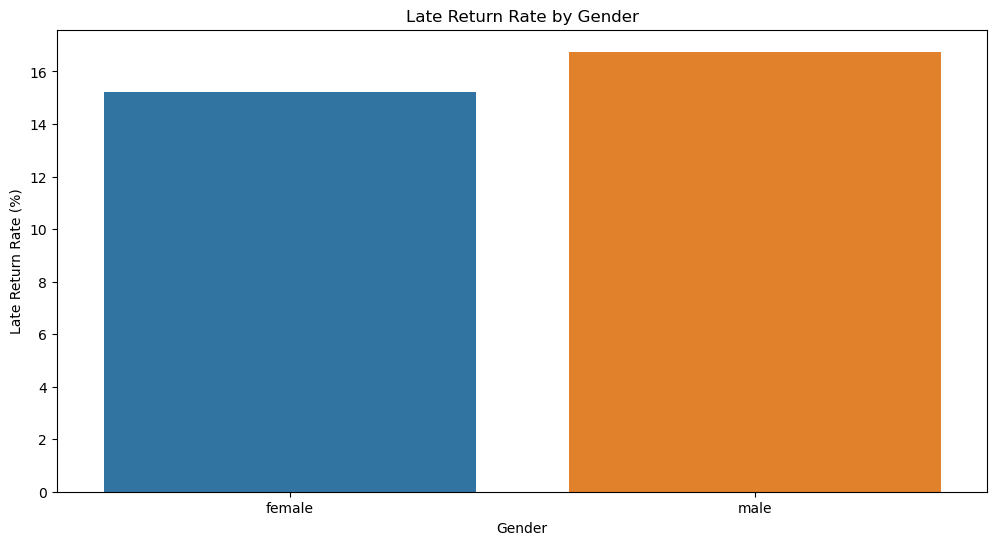

In [368]:
# Plot findings by gender
plt.figure(figsize=(12, 6))
sns.barplot(x=late_by_gender.index, y=late_by_gender.values)
plt.title("Late Return Rate by Gender")
plt.ylabel("Late Return Rate (%)")
plt.xlabel("Gender")
plt.show()

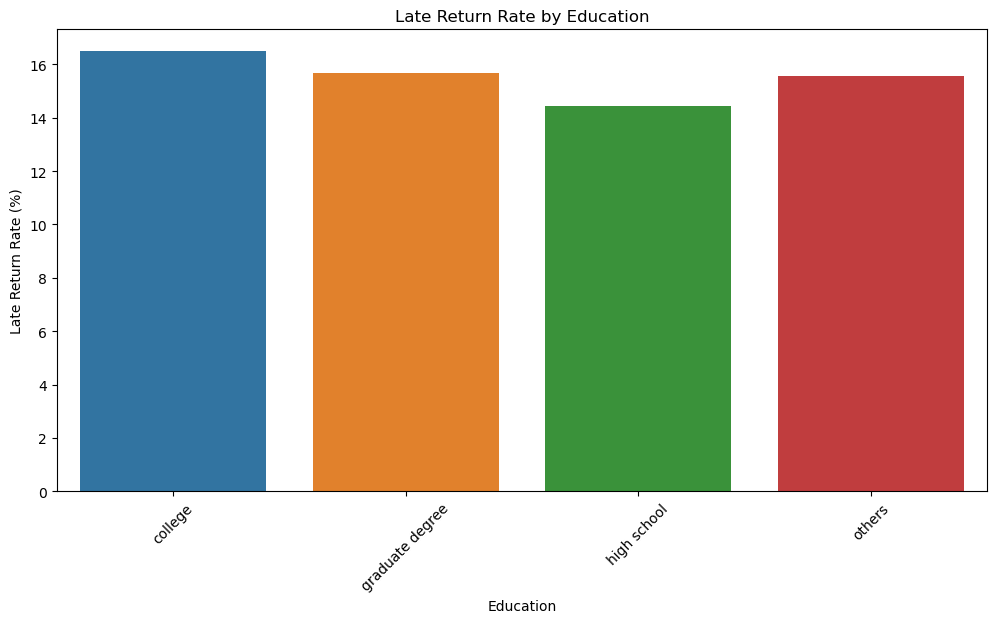

In [369]:
# Plot findings by education
plt.figure(figsize=(12, 6))
sns.barplot(x=late_by_education.index, y=late_by_education.values)
plt.xticks(rotation=45)
plt.title("Late Return Rate by Education")
plt.ylabel("Late Return Rate (%)")
plt.xlabel("Education")
plt.show()

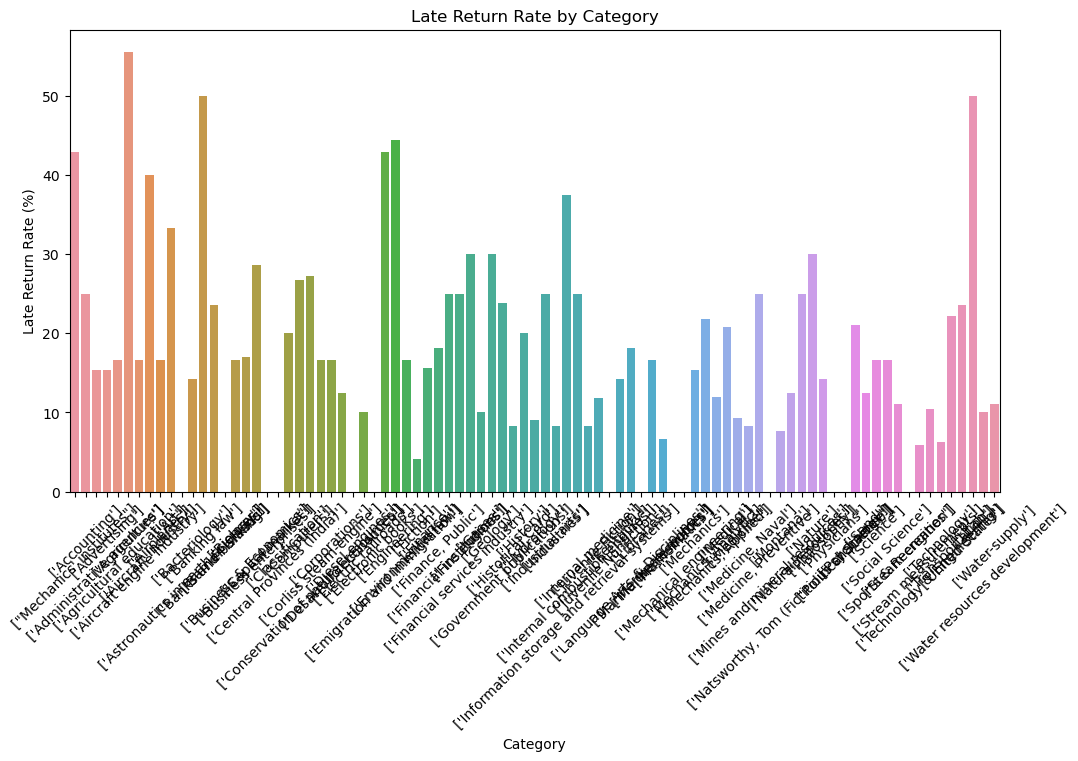

In [370]:
# Plot findings by categories
plt.figure(figsize=(12, 6))
sns.barplot(x=late_by_category.index, y=late_by_category.values)
plt.xticks(rotation=45)
plt.title("Late Return Rate by Category")
plt.ylabel("Late Return Rate (%)")
plt.xlabel("Category")
plt.show()

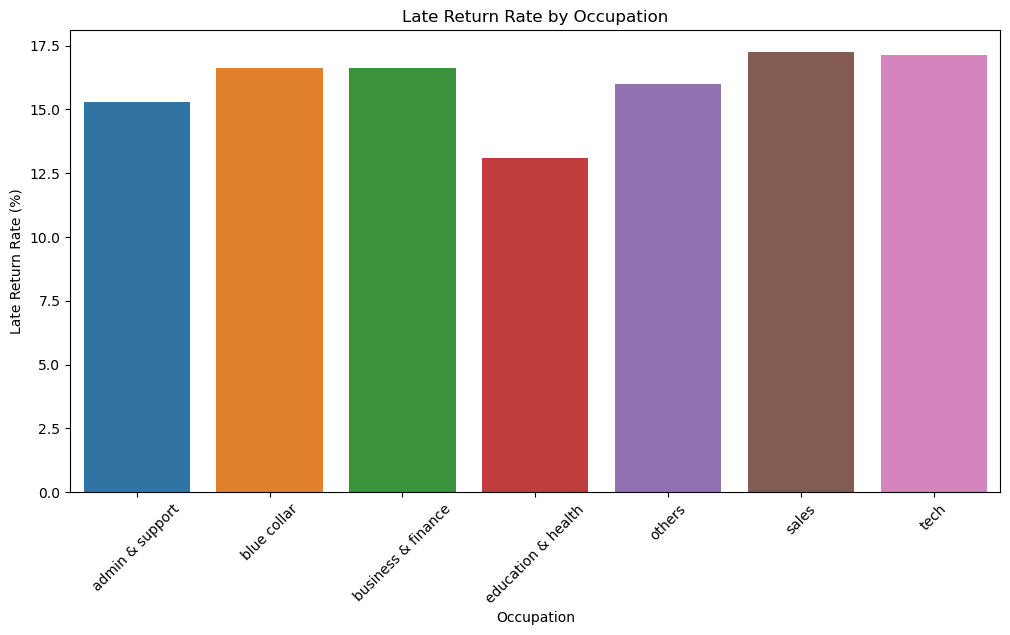

In [371]:
# Plot findings by occupation
plt.figure(figsize=(12, 6))
sns.barplot(x=late_by_occupation.index, y=late_by_occupation.values)
plt.xticks(rotation=45)
plt.title("Late Return Rate by Occupation")
plt.ylabel("Late Return Rate (%)")
plt.xlabel("Occupation")
plt.show()

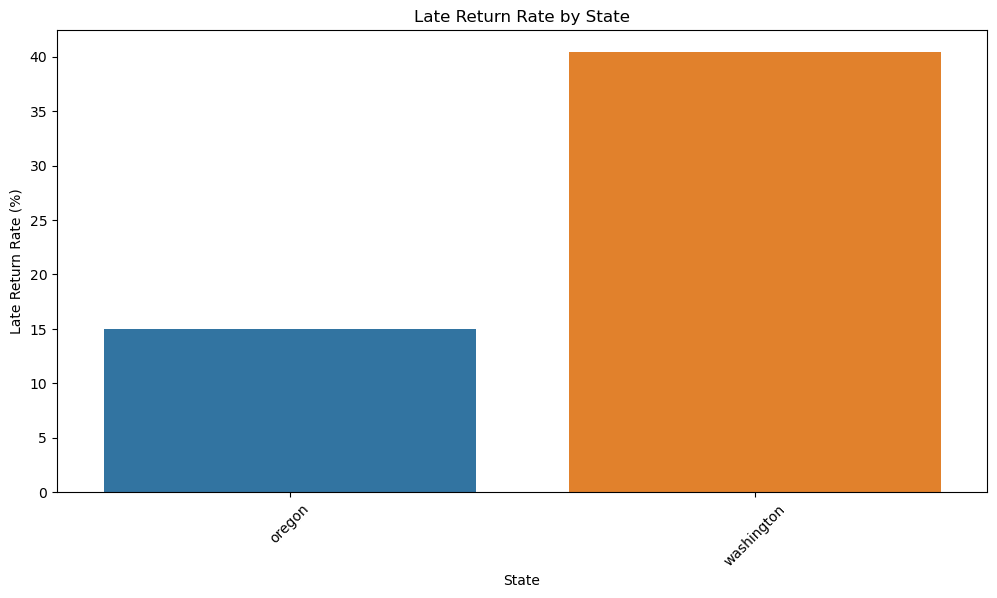

In [372]:
# Plot findings by state
plt.figure(figsize=(12, 6))
sns.barplot(x=late_by_state.index, y=late_by_state.values)
plt.xticks(rotation=45)
plt.title("Late Return Rate by State")
plt.ylabel("Late Return Rate (%)")
plt.xlabel("State")
plt.show()

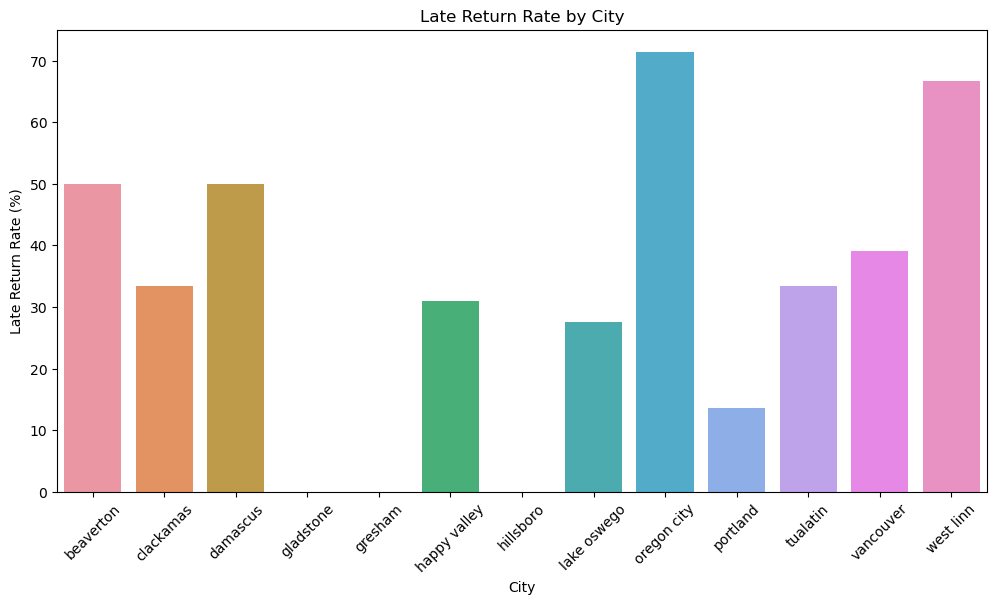

In [373]:
# Plot findings by city
plt.figure(figsize=(12, 6))
sns.barplot(x=late_by_city.index, y=late_by_city.values)
plt.xticks(rotation=45)
plt.title("Late Return Rate by City")
plt.ylabel("Late Return Rate (%)")
plt.xlabel("City")
plt.show()

In [374]:
# Recommendation
print("\nRecommendation:")
print("Implement a reminder system to notify patrons before their due date.")


Recommendation:
Implement a reminder system to notify patrons before their due date.


### Predictive Model
Build a logistic regression model that predicts if a book will be late

In [375]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [376]:
# Encode categorical variables
encoder = LabelEncoder()
data['gender'] = encoder.fit_transform(data['gender'])
data['education'] = encoder.fit_transform(data['education'])
data['categories'] = encoder.fit_transform(data['categories'])

In [377]:
# Select features and target
features = ['gender', 'education', 'categories', 'days_checkedout']
X = data[features]
y = data['is_late']


In [378]:
# Check for NaN values in the dataset
print(X.isnull().sum())

# Fill missing values with the median
X.fillna(X.median(), inplace=True)

gender               0
education            0
categories           0
days_checkedout    155
dtype: int64


C:\Users\Bojana\AppData\Local\Temp\ipykernel_16160\2153508288.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)


In [379]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [380]:
# Predictions
y_pred = model.predict(X_test)

In [381]:
# Evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      1.00      0.99       342
        True       1.00      0.93      0.96        58

    accuracy                           0.99       400
   macro avg       0.99      0.97      0.98       400
weighted avg       0.99      0.99      0.99       400



Check seasonal trends

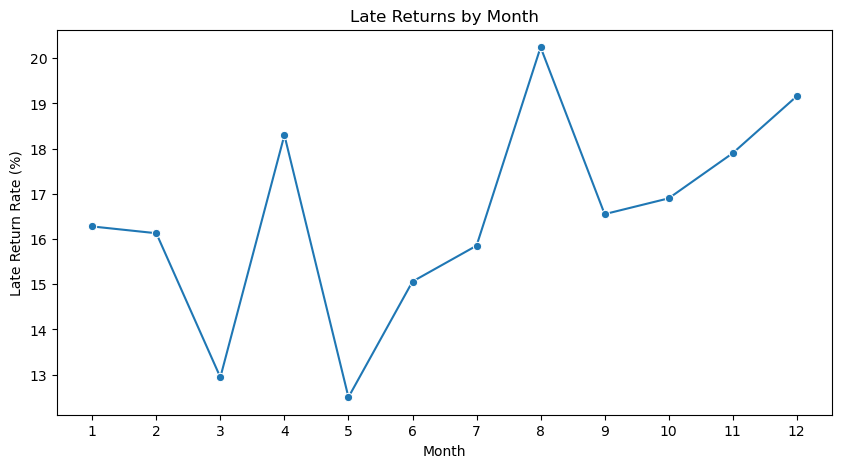

In [382]:
# Extract month of checkout
data['checkout_month'] = data['date_checkout'].dt.month
late_trends = data.groupby('checkout_month')['is_late'].mean() * 100

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=late_trends.index, y=late_trends.values, marker="o")
plt.xticks(range(1, 13))
plt.xlabel("Month")
plt.ylabel("Late Return Rate (%)")
plt.title("Late Returns by Month")
plt.show()

Find the books most often returned late

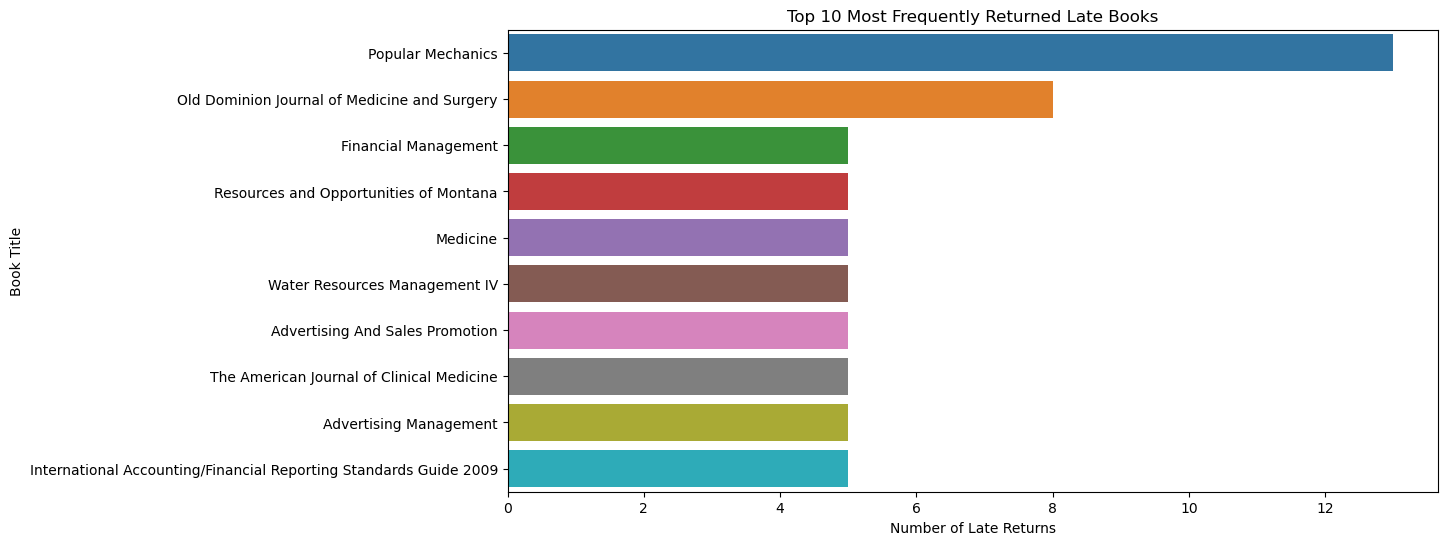

In [383]:
late_books = data[data['is_late']].groupby('title')['is_late'].count().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=late_books.values, y=late_books.index)
plt.xlabel("Number of Late Returns")
plt.ylabel("Book Title")
plt.title("Top 10 Most Frequently Returned Late Books")
plt.show()

Rank libraries by late return rates

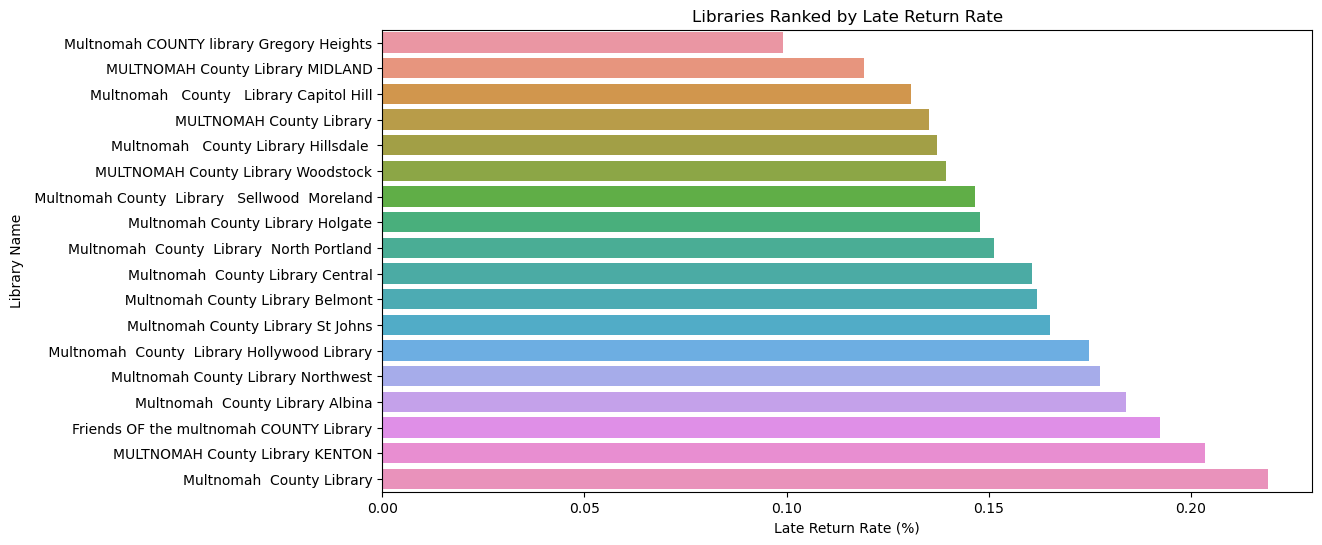

In [384]:
late_libraries = data.groupby("name_x")['is_late'].mean().sort_values()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=late_libraries.values, y=late_libraries.index)
plt.xlabel("Late Return Rate (%)")
plt.ylabel("Library Name")
plt.title("Libraries Ranked by Late Return Rate")
plt.show()